# 2d plot dE/dx vs rr

In [1]:
%load_ext autoreload
%autoreload 2

import math
from itertools import product
import uproot
import awkward
import numpy as np
from scipy.stats import binned_statistic_2d
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import matplotlib
matplotlib.rcParams.update({'font.size': 12})

from calo_likelihood import caloLikelihood
from general_functions import *
from loaders import *
from initializers import *

In [2]:
today = 'calorimetry_trial'

In [3]:
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/pdfs/plane0
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/pdfs/plane1
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/pdfs/plane2

!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/performance_plots/

In [4]:
save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/proton_muon_likelihoods/'
save_folder_pdfs = save_folder + 'pdfs/'
save_folder_performance = save_folder + 'performance_plots/'

In [5]:
branches = [
    'run',
    'sub',
    'evt',
    
    'backtracked_pdg',
    'backtracked_e',
    'backtracked_purity',
    'backtracked_completeness',
    'backtracked_overlay_purity',
    'backtracked_end_process',
    
    'backtracked_start_x',
    'backtracked_start_y',
    'backtracked_start_z',
    
    'backtracked_sce_start_x',
    'backtracked_sce_start_y',
    'backtracked_sce_start_z',
    
    'nplanehits_U',
    'nplanehits_V',
    'nplanehits_Y',
    'trk_score',

    'generation',
    'trk_daughters',
    'shr_daughters',

    'trk_sce_start_x',
    'trk_sce_start_y',
    'trk_sce_start_z',

    'trk_sce_end_x',
    'trk_sce_end_y',
    'trk_sce_end_z',
    
    'trk_theta',
    'trk_phi',

    'trk_dir_x',
    'trk_dir_y',
    'trk_dir_z',
    
    'trk_pid_chipr_u',
    'trk_pid_chipr_v',
    'trk_pid_chipr_y',
    'trk_pid_chimu_y',
    'trk_bragg_p_y',
    'trk_bragg_mu_y',
    'trk_bragg_p_three_planes',

    'trk_len',
    'longest',
    
    'is_hit_montecarlo_u',
    'is_hit_montecarlo_v',
    'is_hit_montecarlo_y',
    
    'dedx_u',
    'dedx_v',
    'dedx_y',
    
    'dqdx_u',
    'dqdx_v',
    'dqdx_y',
    
    'rr_u',
    'rr_v',
    'rr_y',

    'pitch_u',
    'pitch_v',
    'pitch_y',
    
    'dir_x_u',
    'dir_x_v',
    'dir_x_y',
    
    'dir_y_u',
    'dir_y_v',
    'dir_y_y',
    
    'dir_z_u',
    'dir_z_v',
    'dir_z_y',
]

In [11]:
file_bnb = '~/Desktop/MicroBooNE/calorimetry_likelihood/v07/bnb_nu/out_mc_skimmed.root'

folder = "nuselection"
tree = "CalorimetryAnalyzer"

split_factor = 0.9
split_factor2 = 1.
root_file = uproot.open(file_bnb)[folder][tree]
entry_split = int(len(root_file) * split_factor)
entry_split2 = int(len(root_file) * split_factor2)
array_train = root_file.arrays(branches, namedecode="utf-8", entrystop=entry_split)
array_test = root_file.arrays(branches, namedecode="utf-8", entrystart=entry_split, entrystop=entry_split2)

In [7]:
for array in [array_train, array_test]:
    initialisation_for_caloriemtry_data_mc(array)

In [9]:
def selection_for_train(array):
    return (array['backtracked_completeness'] > 0.9) &\
           (array['backtracked_purity'] > 0.9) &\
           (array['start_is_fiducial']) &\
           (array['end_is_fiducial']) &\
           (array['non_inelastic']) &\
           (array['trk_daughters']==0) &\
           (array['shr_daughters']==0)

def selection_for_test(array):
    return (array['start_is_fiducial']) &\
           (array['end_is_fiducial']) &\
           (array['trk_daughters']==0) &\
           (array['shr_daughters']==0)

def muon_for_test(array):
    return selection_for_test(array) & (np.abs(array['backtracked_pdg'])==13)

def proton_for_test(array):
    return selection_for_test(array) & (np.abs(array['backtracked_pdg'])==2212)

def cosmic_for_test(array):
    return selection_for_test(array) & (np.abs(array['backtracked_pdg'])==0)

def selection_planes(array):
    aux = []
    for plane in ['_u', '_v', '_y']:
        aux.append(array['first_last_hit_mask'+plane])
    return aux

In [10]:
selection_train = selection_for_train(array_train)
selection_train_planes = selection_planes(array_train)
selection_test = selection_for_test(array_test)
selection_test_planes = selection_planes(array_test)

NameError: name 'array_train' is not defined

In [10]:
# for array in [array_train, array_test]:
#     array['residual range'] = array['rr_y']
#     array['pitch'] = array['pitch_y']
    
# parameters_names = ['rr', 'pitch']
# parameters_bin_edges = [[0., 2, 4, 7, 10, 15, 20, 30, 50, 100, 300, 2000],
#                   [.0, 0.6, 1, 1.5, 3, 30]]

# dedx_var = 'dedx'
# dedx_var_end = '_cali'
# dedx_bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 9, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50]

# parameters = []
# dedx_vars = []
# for plane in ['u', 'v', 'y']:
#     if plane == 'y':
#         parameters.append(['residual range', 'pitch'])
#         dedx_vars.append(dedx_var+'_'+plane+dedx_var_end)
#     else:
#         parameters.append([parameter_name+'_'+plane for parameter_name in parameters_names])
#         dedx_vars.append(dedx_var+'_'+plane+dedx_var_end)

# pdgcode_var = 'backtracked_pdg'

In [11]:
parameters_names = ['rr', 'pitch']
parameters_bin_edges = [[0., 2, 4, 7, 10, 15, 20, 30, 50, 100, 300, 2000],
                  [.0, 0.6, 1, 1.5, 3, 30]]

dedx_var = 'dedx'
dedx_var_end = '_cali'
dedx_bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 9, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50]

parameters = []
dedx_vars = []
for plane in ['u', 'v', 'y']:
    parameters.append([parameter_name+'_'+plane for parameter_name in parameters_names])
    dedx_vars.append(dedx_var+'_'+plane+dedx_var_end)

pdgcode_var = 'backtracked_pdg'

In [12]:
caloLike_train = caloLikelihood(array_train, quality_mask=selection_train, quality_masks_planes=selection_train_planes)
caloLike_test = caloLikelihood(array_test, quality_mask=selection_test, quality_masks_planes=selection_test_planes)

caloLike_train.setPdgCodeVar(pdgcode_var)
caloLike_test.setPdgCodeVar(pdgcode_var)

In [13]:
for i in [0, 1, 2]:
    caloLike_train.setVariablesBinning(i, parameters[i], parameters_bin_edges, dedx_vars[i], dedx_bins)
    caloLike_train.buildLookUpTableMC(i, 13)    
    caloLike_train.buildLookUpTableMC(i, 2212)    
    caloLike_train.buildLookUpLogLikelihoodRatio(i, [13, 2212])
    caloLike_test.setVariablesBinning(i, parameters[i], parameters_bin_edges, dedx_vars[i], dedx_bins)

/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/calo_likelihood.py:135: RuntimeWarning: invalid value encountered in true_divide
  hist_total/hist_partial[..., np.newaxis],
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/calo_likelihood.py:146: RuntimeWarning: divide by zero encountered in log
  np.log(table_1) - np.log(table_2),
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/calo_likelihood.py:146: RuntimeWarning: invalid value encountered in subtract
  np.log(table_1) - np.log(table_2),


In [14]:
caloLike_train.addCalorimetryVariables(caloLike_test.array, pdg_codes=[13, 2212])
caloLike_train.addCalorimetryVariablesFromLLRTable(caloLike_test.array, selection_test_planes)

/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/calo_likelihood.py:251: RuntimeWarning: divide by zero encountered in log
  return np.log(self.lookup_tables[pdg_code][plane_num][lookup_index])
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/calo_likelihood.py:289: RuntimeWarning: invalid value encountered in subtract
  array['log_like_ratio_{}'.format(plane)] = array['like_{}_sum_{}'.format(pdg_codes[0], plane)] - array['like_{}_sum_{}'.format(pdg_codes[1], plane)]
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/calo_likelihood.py:291: RuntimeWarning: invalid value encountered in add
  array['log_like_ratio'] = array['log_like_ratio_0'] + array['log_like_ratio_1'] + array['log_like_ratio_2']
/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/lib/calo_likelihood.py:292: RuntimeWarning: invalid value encountered in add
  array['log_like_ratio_01'] = array['log_like_ratio_0'] + array['log_like_ratio_1']


In [15]:
caloLike_train.printCplusplusLookUp(filename='/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/calorimetry_likelihood/larsoft_dev/LLRPID_proton_muon_lookup_recali.h', planes=[0, 1, 2])

In [16]:
caloLike_train.save(filename='/home/nic/Dropbox/MicroBooNE/bnb_nue_analysis/calorimetry_likelihood/dumped_objects/proton_muon_lookup.dat')

In [17]:
caloLike_train.logLikelihoodRatioOneHit(2, 2.5, [27, 4])

-0.3963665038400981

# 2d plots dedx vs rr

### for different values of the pitch

In [ ]:
# dedx vs rr
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/dedx_vs_rr/plane0
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/dedx_vs_rr/plane1
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/dedx_vs_rr/plane2

this_save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/proton_muon_likelihoods/dedx_vs_rr/'

pitch_binning = [0.3, 0.6, 1, 1.5, 3, 30]
binning = [50, 50]
range = [[0, 40], [0, 20]]
array = array_train
for i, (plane, plane_label) in enumerate(zip(['_u', '_v', '_y'], ['First induction', 'Second induction', 'Collection'])):
    for pitch_low, pitch_high in zip(pitch_binning[:-1], pitch_binning[1:]):
        pitch_mask = (array['pitch'+plane] >= pitch_low) & (array['pitch'+plane] < pitch_high)
    
        for pdg, pdg_label in zip([13, 2212], ['muon', 'proton']):
            pdg_mask = np.abs(array['backtracked_pdg'])==pdg
            total_mask = selection_train & selection_train_planes[i] & pitch_mask & pdg_mask
            
            dedx = array['dedx'+plane+'_cali'][total_mask].flatten()
            rr = array['rr'+plane][total_mask].flatten()
            
            plt.hist2d(rr, dedx, bins=binning, range=range)
            plt.title('MicroBooNE In Progress', loc='right')
            plt.title('Simulated tracks backtracked to {}\n'.format(pdg_label)+
                      'fully contained, completeness, purity > 90%\n'+
                      'only hits with {:.2g} cm <= pitch < {:.2g} cm\n'.format(pitch_low, pitch_high)+
                      '{} plane'.format(plane_label), loc='left')
            plt.xlabel('Residual range [cm]')
            plt.ylabel('dE/dx [MeV/cm]')
            plt.tight_layout()
            plt.savefig(this_save_folder+'plane{}/pdg_{}_{:.1f}_pitch_{:.1f}'.format(i, pdg, pitch_low, pitch_high).replace('.', '')+'.pdf')
            plt.savefig(this_save_folder+'plane{}/pdg_{}_{:.1f}_pitch_{:.1f}'.format(i, pdg, pitch_low, pitch_high).replace('.', '')+'.png', dpi=250)
            plt.close()

In [ ]:
# dedx given rr
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/dedx_given_rr/plane0
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/dedx_given_rr/plane1
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/dedx_given_rr/plane2
this_save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/proton_muon_likelihoods/dedx_given_rr/'

pitch_binning = [0.3, 0.6, 1, 1.5, 3, 30]
binning = 50
range = [0, 20]
rr_bin = [10, 15]
array = array_train
for i, (plane, plane_label) in enumerate(zip(['_u', '_v', '_y'], ['First induction', 'Second induction', 'Collection'])):
    for pitch_low, pitch_high in zip(pitch_binning[:-1], pitch_binning[1:]):
        pitch_mask = (array['pitch'+plane] >= pitch_low) & (array['pitch'+plane] <= pitch_high)
    
        for pdg, pdg_label in zip([13, 2212], ['muon', 'proton']):
            pdg_mask = np.abs(array['backtracked_pdg'])==pdg
            rr_mask = (array['rr'+plane] > rr_bin[0]) & (array['rr'+plane] < rr_bin[1])
            total_mask = selection_train & selection_train_planes[i] & pitch_mask & pdg_mask & rr_mask
            
            dedx = array['dedx'+plane+'_cali'][total_mask].flatten()
            
            plt.hist(dedx, bins=binning, range=range, label=pdg_label, histtype='step', density=True)
        plt.title('MicroBooNE In Progress', loc='right')
        plt.title('Simulated tracks backtracked to {}\n'.format(pdg_label)+
                  'fully contained, completeness, purity > 90%\n'+
                  'only hits with {:.2g} cm <= pitch < {:.2g} cm\n'.format(pitch_low, pitch_high)+
                  'only hits with {:.2g} cm <= rr < {:.2g} cm\n'.format(rr_bin[0], rr_bin[1])+
                  '{} plane'.format(plane_label), loc='left')
        plt.ylabel('Density [1/(MeV/cm)]')
        plt.xlabel('dE/dx [MeV/cm]')
        plt.tight_layout()
        plt.legend()
        plt.savefig(this_save_folder+'plane{}/{:.1f}_pitch_{:.1f}'.format(i, pitch_low, pitch_high).replace('.', '')+'.pdf')
        plt.savefig(this_save_folder+'plane{}/{:.1f}_pitch_{:.1f}'.format(i, pitch_low, pitch_high).replace('.', '')+'.png', dpi=250)
        plt.close()

In [ ]:
# distribution of direction of particles
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/cos_theta_phi/
this_save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/proton_muon_likelihoods/cos_theta_phi/'

binning = [21, 21]
range = [[-1, 1], [-np.pi, np.pi]]
array = array_train
for pdg, pdg_label in zip([13, 2212], ['muon', 'proton']):
    pdg_mask = np.abs(array['backtracked_pdg'])==pdg
    total_mask = selection_train & pdg_mask
    costheta = np.cos(array['trk_theta'])[total_mask]
    phi = array['trk_phi'][total_mask]
    
    plt.hist2d(costheta, phi, bins=binning, range=range, density=True)
    plt.title('MicroBooNE In Progress', loc='right')
    plt.title('Simulated tracks backtracked to {}\n'.format(pdg_label)+
              'fully contained, completeness, purity > 90%\n', loc='left')
    plt.xlabel(r'track $\cos \theta$')
    plt.ylabel(r'track $\phi$')
    plt.colorbar()
    plt.tight_layout()
    plt.savefig(this_save_folder+'pdg_{}_train.pdf'.format(pdg))
    plt.savefig(this_save_folder+'pdg_{}_train.png'.format(pdg), dpi=250)
    plt.close()
    
    total_mask = selection_for_test(array) & pdg_mask
    costheta = np.cos(array['trk_theta'])[total_mask]
    phi = array['trk_phi'][total_mask]
    
    plt.hist2d(costheta, phi, bins=binning, range=range, density=True)
    plt.title('MicroBooNE In Progress', loc='right')
    plt.title('Simulated tracks backtracked to {}\n'.format(pdg_label)+
              'fully contained\n', loc='left')
    plt.xlabel(r'track $\cos \theta$')
    plt.ylabel(r'track $\phi$')
    plt.colorbar()
    plt.tight_layout()
    plt.savefig(this_save_folder+'pdg_{}_test.pdf'.format(pdg))
    plt.savefig(this_save_folder+'pdg_{}_test.png'.format(pdg), dpi=250)
    plt.close()

In [ ]:
# angular distribution of hits
project_name = 'hit_cos_theta_phi'
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/$project_name/plane0
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/$project_name/plane1
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/$project_name/plane2
this_save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/proton_muon_likelihoods/' + project_name + '/'

binning = [21, 21]
range = [[-1, 1], [-np.pi, np.pi]]
array = array_train
for i, (plane, plane_label) in enumerate(zip(['_u', '_v', '_y'], ['First induction', 'Second induction', 'Collection'])):
    for pdg, pdg_label in zip([13, 2212], ['muon', 'proton']):
        pdg_mask = np.abs(array['backtracked_pdg'])==pdg
        
        total_mask = selection_train & selection_train_planes[i] & pdg_mask
        costheta = np.cos(array['theta_z'+plane])[total_mask].flatten()
        phi = array['theta_yx'+plane][total_mask].flatten()

        plt.hist2d(costheta, phi, bins=binning, range=range, density=True)
        plt.title('MicroBooNE In Progress', loc='right')
        plt.title('Simulated tracks backtracked to {}\n'.format(pdg_label)+
                  'fully contained, completeness, purity > 90%\n{} plane\n'.format(plane_label), loc='left')
        plt.xlabel(r'hit $\cos \theta$')
        plt.ylabel(r'hit $\phi$')
        plt.colorbar()
        plt.tight_layout()
        plt.savefig(this_save_folder+'plane{}/pdg_{}_train.png'.format(i, pdg), dpi=250)
        plt.savefig(this_save_folder+'plane{}/pdg_{}_train.pdf'.format(i, pdg))
        plt.close()

        total_mask = selection_for_test(array) & selection_train_planes[i] & pdg_mask
        costheta = np.cos(array['theta_z'+plane])[total_mask].flatten()
        phi = array['theta_yx'+plane][total_mask].flatten()

        plt.hist2d(costheta, phi, bins=binning, range=range, density=True)
        plt.title('MicroBooNE In Progress', loc='right')
        plt.title('Simulated tracks backtracked to {}\n'.format(pdg_label)+
                  'fully contained\n{} plane\n'.format(plane_label), loc='left')
        plt.xlabel(r'hit $\cos \theta$')
        plt.ylabel(r'hit $\phi$')
        plt.colorbar()
        plt.tight_layout()
        plt.savefig(this_save_folder+'plane{}/pdg_{}_test.png'.format(i, pdg), dpi=250)
        plt.savefig(this_save_folder+'plane{}/pdg_{}_test.pdf'.format(i, pdg))
        plt.close()

In [ ]:
# relationship between pitch and costheta
project_name = 'hit_cos_theta_pitch'
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/$project_name/plane0
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/$project_name/plane1
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/$project_name/plane2
this_save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/proton_muon_likelihoods/' + project_name + '/'

binning = [101, 101]
range = [[-1, 1], [0, 5]]
array = array_train
for i, (plane, plane_label) in enumerate(zip(['_u', '_v', '_y'], ['First induction', 'Second induction', 'Collection'])):
    for pdg, pdg_label in zip([13, 2212], ['muon', 'proton']):
        pdg_mask = np.abs(array['backtracked_pdg'])==pdg
        
        total_mask = selection_train & selection_train_planes[i] & pdg_mask
        costheta = np.cos(array['theta_z'+plane])[total_mask].flatten()
        pitch = array['pitch'+plane][total_mask].flatten()

        plt.hist2d(costheta, pitch, bins=binning, range=range, density=True, norm=LogNorm())
        plt.title('MicroBooNE In Progress', loc='right')
        plt.title('Simulated tracks backtracked to {}\n'.format(pdg_label)+
                  'fully contained, completeness, purity > 90%\n{} plane\n'.format(plane_label), loc='left')
        plt.xlabel(r'hit $\cos \theta$')
        plt.ylabel(r'hit pitch')
        plt.colorbar()
        plt.tight_layout()
        plt.savefig(this_save_folder+'plane{}/pdg_{}_train.png'.format(i, pdg), dpi=250)
        plt.savefig(this_save_folder+'plane{}/pdg_{}_train.pdf'.format(i, pdg))
        plt.close()

        total_mask = selection_for_test(array) & selection_train_planes[i] & pdg_mask
        costheta = np.cos(array['theta_z'+plane])[total_mask].flatten()
        pitch = array['pitch'+plane][total_mask].flatten()

        plt.hist2d(costheta, pitch, bins=binning, range=range, density=True, norm=LogNorm())
        plt.title('MicroBooNE In Progress', loc='right')
        plt.title('Simulated tracks backtracked to {}\n'.format(pdg_label)+
                  'fully contained\n{} plane\n'.format(plane_label), loc='left')
        plt.xlabel(r'hit $\cos \theta$')
        plt.ylabel(r'hit pitch')
        plt.colorbar()
        plt.tight_layout()
        plt.savefig(this_save_folder+'plane{}/pdg_{}_test.png'.format(i, pdg), dpi=250)
        plt.savefig(this_save_folder+'plane{}/pdg_{}_test.pdf'.format(i, pdg))
        plt.close()

In [ ]:
# fraction of hits with bad dE/dx
project_name = 'bad_hit_fraction_cos_theta_phi'
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/$project_name/plane0
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/$project_name/plane1
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/proton_muon_likelihoods/$project_name/plane2
this_save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/proton_muon_likelihoods/' + project_name + '/'

binning = [51, 21]
range = [[-1, 1], [-np.pi, np.pi]]
array = array_train
for i, (plane, plane_label) in enumerate(zip(['_u', '_v', '_y'], ['First induction', 'Second induction', 'Collection'])):
    for pdg, pdg_label in zip([13, 2212], ['muon', 'proton']):
        print(i, pdg)
        pdg_mask = np.abs(array['backtracked_pdg'])==pdg
        
        total_mask = selection_train & selection_train_planes[i] & pdg_mask
        
        costheta = np.cos(array['theta_z'+plane])[total_mask].flatten()
        phi = array['theta_yx'+plane][total_mask].flatten()
        dedx = array['dedx'+plane+'_cali'][total_mask].flatten()
        
        def fraction_of_bad_hits(dedx):
            return ((dedx > 0) & (dedx < 1)).sum() / (dedx > 0).sum()
        ret = binned_statistic_2d(costheta, phi, dedx, statistic=fraction_of_bad_hits, bins=binning, range=range, expand_binnumbers=False)
        plt.pcolormesh(ret.x_edge, ret.y_edge, ret.statistic.T)
        
        plt.title('MicroBooNE In Progress', loc='right')
        plt.title('Fraction of hits with dE/dx < 1 MeV/cm\nSimulated tracks backtracked to {}\n'.format(pdg_label)+
                  'fully contained, completeness, purity > 90%\n{} plane\n'.format(plane_label), loc='left')
        plt.xlabel(r'hit $\cos \theta$ wrt to wires')
        plt.ylabel(r'hit $\phi$ wrt to wires')
        plt.colorbar()
        plt.tight_layout()
        plt.savefig(this_save_folder+'plane{}/pdg_{}_train.png'.format(i, pdg), dpi=250)
        plt.savefig(this_save_folder+'plane{}/pdg_{}_train.pdf'.format(i, pdg))
        plt.close()

        
        
        total_mask = selection_for_test(array) & selection_train_planes[i] & pdg_mask
        
        costheta = np.cos(array['theta_z'+plane])[total_mask].flatten()
        phi = array['theta_yx'+plane][total_mask].flatten()
        dedx = array['dedx'+plane+'_cali'][total_mask].flatten()
        
        def fraction_of_bad_hits(dedx):
            return ((dedx > 0) & (dedx < 1)).sum() / (dedx > 0).sum()
        ret = binned_statistic_2d(costheta, phi, dedx, statistic=fraction_of_bad_hits, bins=binning, range=range, expand_binnumbers=False)
        plt.pcolormesh(ret.x_edge, ret.y_edge, ret.statistic.T)
        
        plt.title('MicroBooNE In Progress', loc='right')
        plt.title('Fraction of hits with dE/dx < 1 MeV/cm\nSimulated tracks backtracked to {}\n'.format(pdg_label)+
                  'fully contained\n{} plane\n'.format(plane_label), loc='left')
        plt.xlabel(r'hit $\cos \theta$ wrt to wires')
        plt.ylabel(r'hit $\phi$ wrt to wires')
        plt.colorbar()
        plt.tight_layout()
        plt.savefig(this_save_folder+'plane{}/pdg_{}_test.png'.format(i, pdg), dpi=250)
        plt.savefig(this_save_folder+'plane{}/pdg_{}_test.pdf'.format(i, pdg))
        plt.close()

# Load data beam on to do some plots with it

In [17]:
range_v = np.linspace(0.01,40,100)

In [6]:
mpv_dict = {'muon': {0.3: np.array([75.27703858, 10.50417838,  7.54307147,  6.3057034 ,  5.51378723,
          4.98155275,  4.5114527 ,  4.2295646 ,  4.00244235,  3.81458633,
          3.65600097,  3.51991478,  3.37430958,  3.2733431 ,  3.18349973,
          3.10292319,  3.0301619 ,  2.96406232,  2.88940652,  2.8351536 ,
          2.78510907,  2.73877391,  2.69572769,  2.65561335,  2.60913227,
          2.57456196,  2.5420752 ,  2.51148013,  2.48260854,  2.45531228,
          2.42320901,  2.39900011,  2.37599102,  2.35409134,  2.33321982,
          2.31330322,  2.29427533,  2.27164931,  2.25440982,  2.237883  ,
          2.22202444,  2.20679347,  2.19215275,  2.17462984,  2.16119573,
          2.14824974,  2.13576538,  2.12371809,  2.11208509,  2.0980943 ,
          2.08731822,  2.07689274,  2.066801  ,  2.05702721,  2.04755662,
          2.03612375,  2.02728605,  2.01870958,  2.01038305,  2.00229583,
          1.99443788,  1.98492351,  1.97754765,  1.97037219,  1.96338927,
          1.95659142,  1.94997157,  1.9419369 ,  1.93568739,  1.92959514,
          1.92365143,  1.91785099,  1.91218883,  1.90529834,  1.8999302 ,
          1.89468564,  1.88956055,  1.88455102,  1.87965333,  1.87368303,
          1.8690241 ,  1.86446592,  1.86000538,  1.85563952,  1.85136547,
          1.84614786,  1.84207054,  1.83807652,  1.83416341,  1.83032888,
          1.82657072,  1.82288679,  1.81838314,  1.81485883,  1.81140233,
          1.80801184,  1.80468558,  1.80142188,  1.79742772,  1.79429886]),
  1: np.array([81.82722581, 11.41761901,  8.19858824,  6.85335466,  5.99234856,
          5.41363944,  4.90244939,  4.59589647,  4.34888254,  4.14455794,
          3.97205632,  3.82401622,  3.66560629,  3.55575019,  3.45798811,
          3.37030198,  3.29111362,  3.21916891,  3.13790301,  3.07884027,
          3.02435385,  2.9739012 ,  2.92702518,  2.88333759,  2.83271045,
          2.79505219,  2.75965996,  2.72632513,  2.6948648 ,  2.66511787,
          2.63012811,  2.60373927,  2.5786555 ,  2.55477849,  2.5320199 ,
          2.51030007,  2.48954701,  2.46486633,  2.44605882,  2.42802663,
          2.41072148,  2.39409911,  2.37811894,  2.3589902 ,  2.34432287,
          2.33018665,  2.31655273,  2.3033944 ,  2.29068689,  2.27540152,
          2.26362651,  2.25223306,  2.2412028 ,  2.23051858,  2.22016434,
          2.20766274,  2.19799733,  2.18861625,  2.17950724,  2.1706587 ,
          2.16205973,  2.15164637,  2.1435722 ,  2.13571619,  2.12806979,
          2.12062487,  2.11337374,  2.10457129,  2.09772394,  2.09104782,
          2.08453373,  2.07817592,  2.07196896,  2.06441446,  2.05852824,
          2.05277682,  2.04715574,  2.04166073,  2.03628772,  2.0297371 ,
          2.02462459,  2.019622  ,  2.01472595,  2.0099332 ,  2.00524062,
          1.99951124,  1.99503333,  1.99064632,  1.98634759,  1.98213462,
          1.97800499,  1.97395637,  1.96900611,  1.96513169,  1.96133129,
          1.95760292,  1.95394466,  1.95035468,  1.94596051,  1.94251772])},
 'proton': {0.3: np.array([288.90446811,  33.36008254,  23.24846796,  19.0563639 ,
          16.38287677,  14.58912581,  13.0056833 ,  12.05597818,
          11.29026466,  10.65630501,  10.1204673 ,   9.65999827,
           9.16644576,   8.82353574,   8.51784073,   8.24314586,
           7.99459361,   7.76832568,   7.51214932,   7.32551616,
           7.1529668 ,   6.99283416,   6.84371387,   6.70441345,
           6.5425572 ,   6.42183602,   6.30810183,   6.20071396,
           6.09911074,   6.00279741,   5.88918258,   5.80324486,
           5.72134287,   5.64317458,   5.56846854,   5.49698003,
           5.42848777,   5.34678202,   5.2843253 ,   5.22427628,
           5.16648642,   5.11081965,   5.05715104,   4.99270099,
           4.94312169,   4.89519865,   4.8488431 ,   4.80397279,
           4.76051136,   4.70805809,   4.6675144 ,   4.62816603,
           4.58995637,   4.55283247,   4.51674477,   4.47302174,
           4.43909984,   4.40607316,   4.37390372,   4.34255574,
           4.31199547,   4.27485456,   4.24595295,   4.21774187,
           4.19019476,   4.16328649,   4.13699322,   4.10495713,
           4.07996666,   4.05552175,   4.03160323,   4.00819288,
           3.98527331,   3.95728886,   3.93541418,   3.91397922,
           3.89296974,   3.87237216,   3.85217349,   3.82746722,
           3.80812144,   3.78913607,   3.7705003 ,   3.75220378,
           3.73423657,   3.71222617,   3.69496562,   3.67800476,
           3.66133522,   3.64494894,   3.62883818,   3.61299551,
           3.59355823,   3.5782929 ,   3.56327328,   3.548493  ,
           3.53394595,   3.51962621,   3.5020375 ,   3.48820861]),
  1: np.array([314.04359052,  36.26275106,  25.27119192,  20.7142522 ,
          17.80807707,  15.85819458,  14.13691447,  13.10453082,
          12.27215125,  11.58299214,  11.00049475,  10.4999257 ,
           9.96338809,   9.59061008,   9.25828631,   8.95966102,
           8.68945394,   8.44347097,   8.16497141,   7.96207342,
           7.77448529,   7.60039482,   7.43827542,   7.28683081,
           7.11086252,   6.97961472,   6.85596226,   6.73920868,
           6.62874344,   6.52402869,   6.40050218,   6.30706653,
           6.21801804,   6.13302838,   6.05180249,   5.97407434,
           5.89960338,   5.81076475,   5.74285498,   5.67756261,
           5.61472618,   5.55419776,   5.49584155,   5.42576158,
           5.37185089,   5.31974073,   5.26933461,   5.22054313,
           5.17328325,   5.11624515,   5.07215721,   5.02936874,
           4.98781818,   4.947448  ,   4.90820429,   4.86065708,
           4.8237679 ,   4.78785195,   4.75286793,   4.71877695,
           4.68554235,   4.64515083,   4.61371943,   4.58303874,
           4.55307989,   4.52381556,   4.49521983,   4.46037807,
           4.4331987 ,   4.40661244,   4.38059847,   4.35513696,
           4.33020901,   4.29977207,   4.27598011,   4.2526662 ,
           4.22981487,   4.20741136,   4.18544153,   4.15856857,
           4.137526  ,   4.11687527,   4.09660462,   4.0767028 ,
           4.05715902,   4.03321701,   4.01444152,   3.99599185,
           3.97785889,   3.96003391,   3.94250849,   3.92527452,
           3.90413007,   3.88752381,   3.87118469,   3.8551058 ,
           3.83928048,   3.82370229,   3.80456766,   3.78952316])}}

In [11]:
file_data_on = '~/Desktop/MicroBooNE/calorimetry_likelihood/v07/beam_on/out_proton_skimmed.root'

folder = "nuselection"
tree = "CalorimetryAnalyzer"

stop_factor = 1.
root_file = uproot.open(file_data_on)[folder][tree]
entry_stop = int(len(root_file) * stop_factor)
array_data = root_file.arrays(branches, namedecode="utf-8", entrystop=entry_stop)

In [12]:
initialisation_for_caloriemtry_data_mc(array_data)
selection_data_planes = selection_planes(array_data)
selection_data_test = selection_for_test(array_data)
compute_pid(array_data)

In [13]:
trk_score_selection = (array_data['trk_score'] > 0.8)
llr_pid_data = array_data['llr_012_n'][selection_data_test & trk_score_selection]

Text(0.5, 1.0, 'Data Beam ON, fully contained tracks')

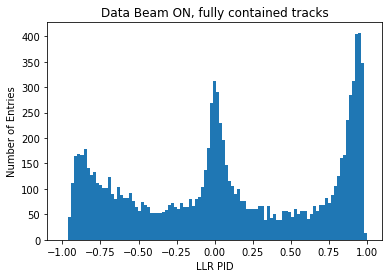

In [14]:
plt.hist(llr_pid_data, bins=101, range=[-1, 1])
plt.xlabel('LLR PID')
plt.ylabel('Number of Entries')
plt.title('Data Beam ON, fully contained tracks')

In [41]:
# dedx vs rr in bins of pitch hit by hit
project_name = 'beam_on_dedx_rr/pitch/'
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/$project_name/plane0
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/$project_name/plane1
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/$project_name/plane2
this_save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/' + project_name + '/'

pitch_binning = [0.3, 1]
binning = [50, 50]
range = [[0, 40], [0, 20]]
array = array_data
trk_score_selection = (array['trk_score'] > 0.8)
for i, (plane, plane_label) in enumerate(zip(['_u', '_v', '_y'], ['First induction', 'Second induction', 'Collection'])):
    for pitch_low, pitch_high in zip(pitch_binning[:-1], pitch_binning[1:]):
        pitch_mask = (array['pitch'+plane] >= pitch_low) & (array['pitch'+plane] < pitch_high)
    
        for llr_lim, pdg_label in zip([[-1, -0.5], [0.5, 1]], ['proton', 'muon']):
            llr_mask = (array['llr_012_n'] >= llr_lim[0]) & (array['llr_012_n'] < llr_lim[1])
            total_mask = selection_data_test & selection_data_planes[i] & trk_score_selection & pitch_mask & llr_mask
            
            dedx = array['dedx'+plane][total_mask].flatten()
            rr = array['rr'+plane][total_mask].flatten()
            
            plt.hist2d(rr, dedx, bins=binning, range=range)
            plt.title('MicroBooNE In Progress', loc='right')
            plt.title('Reconstructed tracks in data Beam ON\n'.format(pdg_label)+
                      'fully contained, track score > 0.8\n'+
                      '{} candidate with {:.2g} < pid < {:.2g}\n'.format(pdg_label, llr_lim[0], llr_lim[1])+
                      'only hits with {:.2g} cm <= pitch < {:.2g} cm\n'.format(pitch_low, pitch_high)+
                      '{} plane'.format(plane_label), loc='left')
            plt.xlabel('Residual range [cm]')
            plt.ylabel('dE/dx [MeV/cm]')
            
            plt.fill_between(range_v, mpv_dict[pdg_label][0.3], mpv_dict[pdg_label][1], color='white', alpha=0.5, label='MPV @ 0.3 < pitch < 1 cm')

            plt.legend()
            plt.tight_layout()
            plt.savefig(this_save_folder+'plane{}/pdg_{}_{:.1f}_pitch_{:.1f}'.format(i, pdg_label, pitch_low, pitch_high).replace('.', '')+'.png', dpi=250)
            plt.savefig(this_save_folder+'plane{}/pdg_{}_{:.1f}_pitch_{:.1f}'.format(i, pdg_label, pitch_low, pitch_high).replace('.', '')+'.pdf')
            plt.close()

In [40]:
# dedx vs rr in bins of track pitch wrt collection plane
project_name = 'beam_on_dedx_rr/track_pitch_y/'
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/$project_name/plane0
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/$project_name/plane1
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/$project_name/plane2
this_save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/' + project_name + '/'

global_pitch_binning = [0.3, 1, 1.5, 30]
binning = [50, 50]
range = [[0, 40], [0, 20]]
array = array_data
trk_score_selection = (array['trk_score'] > 0.8)
array['global_pitch_y'] = 0.3/np.cos(array['trk_theta'])
for pitch_low, pitch_high in zip(pitch_binning[:-1], pitch_binning[1:]):
    pitch_mask = (array['global_pitch_y'] >= pitch_low) & (array['global_pitch_y'] < pitch_high)
    
    for i, (plane, plane_label) in enumerate(zip(['_u', '_v', '_y'], ['First induction', 'Second induction', 'Collection'])):
        for llr_lim, pdg_label in zip([[-1, -0.5], [0.5, 1]], ['proton', 'muon']):
            llr_mask = (array['llr_012_n'] >= llr_lim[0]) & (array['llr_012_n'] < llr_lim[1])
            total_mask = selection_data_test & selection_data_planes[i] & trk_score_selection & pitch_mask & llr_mask
            
            dedx = array['dedx'+plane][total_mask].flatten()
            rr = array['rr'+plane][total_mask].flatten()
            
            plt.hist2d(rr, dedx, bins=binning, range=range)
            plt.title('MicroBooNE In Progress', loc='right')
            plt.title('Reconstructed tracks in data Beam ON\n'.format(pdg_label)+
                      'fully contained, track score > 0.8\n'+
                      '{} candidate with {:.2g} < pid < {:.2g}\n'.format(pdg_label, llr_lim[0], llr_lim[1])+
                      'only tracks with {:.2g} cm <= track pitch Y < {:.2g} cm\n'.format(pitch_low, pitch_high)+
                      '{} plane'.format(plane_label), loc='left')
            
            plt.fill_between(range_v, mpv_dict[pdg_label][0.3], mpv_dict[pdg_label][1], color='white', alpha=0.5, label='MPV @ 0.3 < pitch < 1 cm')
            plt.legend()
            plt.xlabel('Residual range [cm]')
            plt.ylabel('dE/dx [MeV/cm]')
            plt.tight_layout()
            plt.savefig(this_save_folder+'plane{}/pdg_{}_{:.1f}_pitch_{:.1f}'.format(i, pdg_label, pitch_low, pitch_high).replace('.', '')+'.png', dpi=250)
            plt.savefig(this_save_folder+'plane{}/pdg_{}_{:.1f}_pitch_{:.1f}'.format(i, pdg_label, pitch_low, pitch_high).replace('.', '')+'.pdf')
            plt.close()

In [17]:
# dedx vs rr
project_name = 'beam_on_dedx_rr/track_pitch_y_both_curves/'
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/$project_name/plane0
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/$project_name/plane1
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/$project_name/plane2
this_save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/' + project_name + '/'

global_pitch_binning = [0.3, 1, 1.5, 30]
binning = [50, 50]
range = [[0, 40], [0, 20]]
array = array_data
trk_score_selection = (array['trk_score'] > 0.8)
array['global_pitch_y'] = 0.3/np.cos(array['trk_theta'])
for pitch_low, pitch_high in zip(global_pitch_binning[:-1], global_pitch_binning[1:]):
    pitch_mask = (array['global_pitch_y'] >= pitch_low) & (array['global_pitch_y'] < pitch_high)
    
    for i, (plane, plane_label) in enumerate(zip(['_u', '_v', '_y'], ['First induction', 'Second induction', 'Collection'])):
        for llr_lim, pdg_label in zip([[-1, -0.5], [0.5, 1]], ['proton', 'muon']):
            llr_mask = (array['llr_012_n'] >= llr_lim[0]) & (array['llr_012_n'] < llr_lim[1])
            total_mask = selection_data_test & selection_data_planes[i] & trk_score_selection & pitch_mask & llr_mask
            
            dedx = array['dedx'+plane][total_mask].flatten()
            rr = array['rr'+plane][total_mask].flatten()
            
            plt.hist2d(rr, dedx, bins=binning, range=range)
            plt.title('MicroBooNE In Progress', loc='right')
            plt.title('Reconstructed tracks in data Beam ON\n'.format(pdg_label)+
                      'fully contained, track score > 0.8\n'+
                      '{} candidate with {:.2g} < pid < {:.2g}\n'.format(pdg_label, llr_lim[0], llr_lim[1])+
                      'only tracks with {:.2g} cm <= track pitch Y < {:.2g} cm\n'.format(pitch_low, pitch_high)+
                      '{} plane'.format(plane_label), loc='left')
            
            plt.plot(range_v, mpv_dict['proton'][0.3], color='red', label='Proton MPV @ pitch = 0.3 cm')
            plt.plot(range_v, mpv_dict['muon'][0.3], color='orange', label='Muon MPV @ pitch = 0.3 cm')
            plt.legend()
            plt.xlabel('Residual range [cm]')
            plt.ylabel('dE/dx [MeV/cm]')
            plt.tight_layout()
            plt.savefig(this_save_folder+'plane{}/pdg_{}_{:.1f}_pitch_{:.1f}'.format(i, pdg_label, pitch_low, pitch_high).replace('.', '')+'.png', dpi=250)
            plt.savefig(this_save_folder+'plane{}/pdg_{}_{:.1f}_pitch_{:.1f}'.format(i, pdg_label, pitch_low, pitch_high).replace('.', '')+'.pdf')
            plt.close()

In [25]:
# for APS grad slam
project_name = 'beam_on_dedx_rr/track_pitch_y_both_curves_for_aps_grad_slam/'
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/$project_name/plane0
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/$project_name/plane1
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/$project_name/plane2
this_save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/' + project_name + '/'

params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)
matplotlib.rcParams.update({'font.size': 16})
                    
global_pitch_binning = [0.3, 1, 1.5, 30]
binning = [50, 50]
range = [[0, 40], [0, 20]]
array = array_data
trk_score_selection = (array['trk_score'] > 0.8)
array['global_pitch_y'] = 0.3/np.cos(array['trk_theta'])
for pitch_low, pitch_high in zip(global_pitch_binning[:-1], global_pitch_binning[1:]):
    pitch_mask = (array['global_pitch_y'] >= pitch_low) & (array['global_pitch_y'] < pitch_high)
    
    i = 2
    plane = '_y'
    for llr_lim, pdg_label in zip([[-1, -0.5], [0.5, 1]], ['proton', 'muon']):
        llr_mask = (array['llr_012_n'] >= llr_lim[0]) & (array['llr_012_n'] < llr_lim[1])
        total_mask = selection_data_test & selection_data_planes[i] & trk_score_selection & pitch_mask & llr_mask

        dedx = array['dedx'+plane][total_mask].flatten()
        rr = array['rr'+plane][total_mask].flatten()

        plt.hist2d(rr, dedx, bins=binning, range=range)
        plt.title('MicroBooNE In Progress', loc='right', color='w')
#             plt.title('Reconstructed tracks in data Beam ON\n'.format(pdg_label)+
#                       'fully contained, track score > 0.8\n'+
#                       '{} candidate with {:.2g} < pid < {:.2g}\n'.format(pdg_label, llr_lim[0], llr_lim[1])+
#                       'only tracks with {:.2g} cm <= track pitch Y < {:.2g} cm\n'.format(pitch_low, pitch_high)+
#                       '{} plane'.format(plane_label), loc='left')

        plt.plot(range_v, mpv_dict['proton'][0.3], color='red', label='Proton')
        plt.plot(range_v, mpv_dict['muon'][0.3], color='orange', label='Muon')
        plt.legend()
        plt.xlabel('Distance from the stop')
        plt.xticks([])
        plt.yticks([])
        plt.ylabel('Energy deposition')
        plt.tight_layout()
        plt.savefig(this_save_folder+'plane{}/pdg_{}_{:.1f}_pitch_{:.1f}'.format(i, pdg_label, pitch_low, pitch_high).replace('.', '')+'.png', dpi=250, transparent=True)
        plt.savefig(this_save_folder+'plane{}/pdg_{}_{:.1f}_pitch_{:.1f}'.format(i, pdg_label, pitch_low, pitch_high).replace('.', '')+'.pdf', transparent=True)
        plt.close()
        

# Repeat same exercise with Monte Carlo

In [18]:
file_data_on = '~/Desktop/MicroBooNE/calorimetry_likelihood/v07/bnb_nu/out_proton_skimmed.root'

folder = "nuselection"
tree = "CalorimetryAnalyzer"

stop_factor = 1.
root_file = uproot.open(file_data_on)[folder][tree]
entry_stop = int(len(root_file) * stop_factor)
array_mc = root_file.arrays(branches, namedecode="utf-8", entrystop=entry_stop)

In [25]:
initialisation_for_caloriemtry_data_mc(array_mc)
selection_mc_planes = selection_planes(array_mc)
selection_mc_test = selection_for_test(array_mc)
compute_pid(array_mc)

In [26]:
trk_score_selection = (array_mc['trk_score'] > 0.8)
llr_pid_data = array_mc['llr_012_n'][selection_data_test & trk_score_selection]

Text(0.5, 1.0, 'Data Beam ON, fully contained tracks')

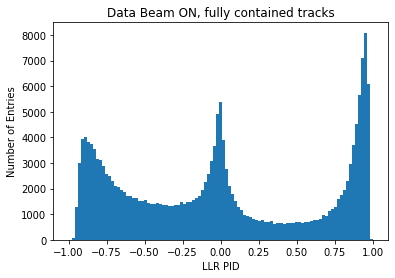

In [27]:
plt.hist(llr_pid_data, bins=101, range=[-1, 1])
plt.xlabel('LLR PID')
plt.ylabel('Number of Entries')
plt.title('Data Beam ON, fully contained tracks')

In [28]:
# dedx vs rr
project_name = 'bnb_nu_dedx_rr/track_pitch_y_both_curves/'
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/$project_name/plane0
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/$project_name/plane1
!mkdir -p ~/Dropbox/MicroBooNE/_fig/$today/$project_name/plane2
this_save_folder = '/home/nic/Dropbox/MicroBooNE/_fig/' + today + '/' + project_name + '/'

global_pitch_binning = [0.3, 1, 1.5, 30]
binning = [50, 50]
range = [[0, 40], [0, 20]]
array = array_mc
trk_score_selection = (array['trk_score'] > 0.8)
array['global_pitch_y'] = 0.3/np.cos(array['trk_theta'])
for pitch_low, pitch_high in zip(global_pitch_binning[:-1], global_pitch_binning[1:]):
    pitch_mask = (array['global_pitch_y'] >= pitch_low) & (array['global_pitch_y'] < pitch_high)
    
    for i, (plane, plane_label) in enumerate(zip(['_u', '_v', '_y'], ['First induction', 'Second induction', 'Collection'])):
        for llr_lim, pdg_label in zip([[-1, -0.5], [0.5, 1]], ['proton', 'muon']):
            llr_mask = (array['llr_012_n'] >= llr_lim[0]) & (array['llr_012_n'] < llr_lim[1])
            total_mask = selection_mc_test & selection_mc_planes[i] & trk_score_selection & pitch_mask & llr_mask
            
            dedx = array['dedx'+plane][total_mask].flatten()
            rr = array['rr'+plane][total_mask].flatten()
            
            plt.hist2d(rr, dedx, bins=binning, range=range)
            plt.title('MicroBooNE In Progress', loc='right')
            plt.title('Reconstructed tracks in BNB MC\n'.format(pdg_label)+
                      'fully contained, track score > 0.8\n'+
                      '{} candidate with {:.2g} < pid < {:.2g}\n'.format(pdg_label, llr_lim[0], llr_lim[1])+
                      'only tracks with {:.2g} cm <= track pitch Y < {:.2g} cm\n'.format(pitch_low, pitch_high)+
                      '{} plane'.format(plane_label), loc='left')
            
            plt.plot(range_v, mpv_dict['proton'][0.3], color='red', label='Proton MPV @ pitch = 0.3 cm')
            plt.plot(range_v, mpv_dict['muon'][0.3], color='orange', label='Muon MPV @ pitch = 0.3 cm')
            plt.legend()
            plt.xlabel('Residual range [cm]')
            plt.ylabel('dE/dx [MeV/cm]')
            plt.tight_layout()
            plt.savefig(this_save_folder+'plane{}/pdg_{}_{:.1f}_pitch_{:.1f}'.format(i, pdg_label, pitch_low, pitch_high).replace('.', '')+'.png', dpi=250)
            plt.savefig(this_save_folder+'plane{}/pdg_{}_{:.1f}_pitch_{:.1f}'.format(i, pdg_label, pitch_low, pitch_high).replace('.', '')+'.pdf')
            plt.close()